In [1]:
import scipy.stats as ss
import statsmodels.stats.power as smp
import numpy as np
from statsmodels.stats.power import TTestIndPower
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#importar los datos
path = "C:/Users/Carola/Documents/Especializacion_bioinfo/ESTADISTICA/DataSets/tabla_trabajo_final.csv"
df_con_nan = pd.read_csv(path,sep=',')

descripcion general de los datos

In [3]:
df_con_nan.head(5)

,Unnamed: 0,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
0,0,13.0,10.925926,7.740741,23.0,7.666667,0.411483,8.0,9.482171,32.285667,4.482171,11.0,0.051435,18.0,25.0,27.0,2.0
1,1,4.0,10.941176,8.117647,7.0,7.764706,0.347826,2.0,3.206613,9.208165,1.206613,12.0,0.173913,5.0,12.0,17.0,2.0
2,2,3.0,7.230769,6.884615,4.0,6.615385,0.050279,1.0,2.506131,11.242589,0.506131,18.0,0.050279,2.0,12.0,26.0,1.0
3,3,15.0,10.363636,7.454545,0.0,9.636364,0.390244,14.0,12.507874,NaN,11.507874,2.0,0.027875,-1.0,17.0,11.0,2.0
4,4,24.0,10.689655,7.931034,26.0,8.229885,0.347826,13.0,19.740930,7.648054,8.740930,25.0,0.026756,15.0,41.0,87.0,2.0


In [4]:
df_con_nan.describe()

,Unnamed: 0,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
count,2397.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2069.000000,2336.000000,2336.000000,2336.000000,2336.000000,2397.000000,2397.000000,2397.00000
mean,9.468919,8.585616,16.546522,13.009426,10.145120,13.905734,0.307328,4.600599,7.418224,29.337625,3.433206,6.950771,0.090817,6.160103,14.815603,18.597413,1.53567
std,8.807886,6.284302,15.008828,11.534076,6.351037,12.145036,0.803676,4.526220,21.870741,128.084665,21.580814,10.210784,0.107791,5.520145,6.206602,18.520580,0.49883
min,0.000000,1.000000,2.636364,2.125000,0.000000,2.111111,-0.040698,1.000000,-47.481535,-4608.037502,-69.481535,-166.000000,-0.020349,-24.000000,4.000000,5.000000,1.00000
25%,3.000000,4.000000,6.117647,5.482069,6.000000,5.571429,0.091938,1.000000,2.655810,8.907313,0.521316,3.000000,0.026786,3.000000,10.000000,11.000000,1.00000
50%,7.000000,7.000000,7.732143,6.312500,9.000000,6.753378,0.154744,3.000000,5.372176,16.305071,1.379049,6.000000,0.056499,5.000000,14.000000,15.000000,2.00000
75%,14.000000,12.000000,23.377404,18.333333,13.000000,19.620629,0.263229,7.000000,9.016228,32.808022,3.353218,9.000000,0.111471,9.000000,18.000000,20.000000,2.00000
max,49.000000,48.000000,124.300000,98.600000,50.000000,98.666667,16.129630,43.000000,785.487402,1624.952729,783.487402,115.000000,1.008814,44.000000,56.000000,506.000000,2.00000


In [5]:
df_con_nan.shape

(2397, 17)

tratamiento de NaN

In [6]:
df_con_nan.isna().sum()

Unnamed: 0                0
tiempo_maximo            61
intensidad_maxima        61
intensidad_minima        61
tiempo_valle             61
intensidad_valle         61
sparks_amplitud          61
TTP                      61
sparks_tiempo_pico50     61
sp_tau                  328
TTP50                    61
fullWidth                61
(ΔF/F0)/ΔTmax            61
fullDuration             61
width                     0
high                      0
flag                      0
dtype: int64

Tratamiento de NaN

In [7]:

nan_por_fila = df_con_nan.isna().sum(axis=1) #número de valores NaN en cada fila utilizando isna().sum(axis=1).
filas_a_eliminar = df_con_nan[nan_por_fila > 5] #filtra filas que tienen más de 5 valores NaN y se almacenan en la variable filas_a_eliminar
eliminadas = df_con_nan[nan_por_fila > 5].copy() #Armo un df con las filas que van a ser eliminadas
df = df_con_nan.drop(filas_a_eliminar.index) #elimina las filas con mas de 5 NaN

In [8]:
df.isna().sum()

Unnamed: 0                0
tiempo_maximo             0
intensidad_maxima         0
intensidad_minima         0
tiempo_valle              0
intensidad_valle          0
sparks_amplitud           0
TTP                       0
sparks_tiempo_pico50      0
sp_tau                  267
TTP50                     0
fullWidth                 0
(ΔF/F0)/ΔTmax             0
fullDuration              0
width                     0
high                      0
flag                      0
dtype: int64

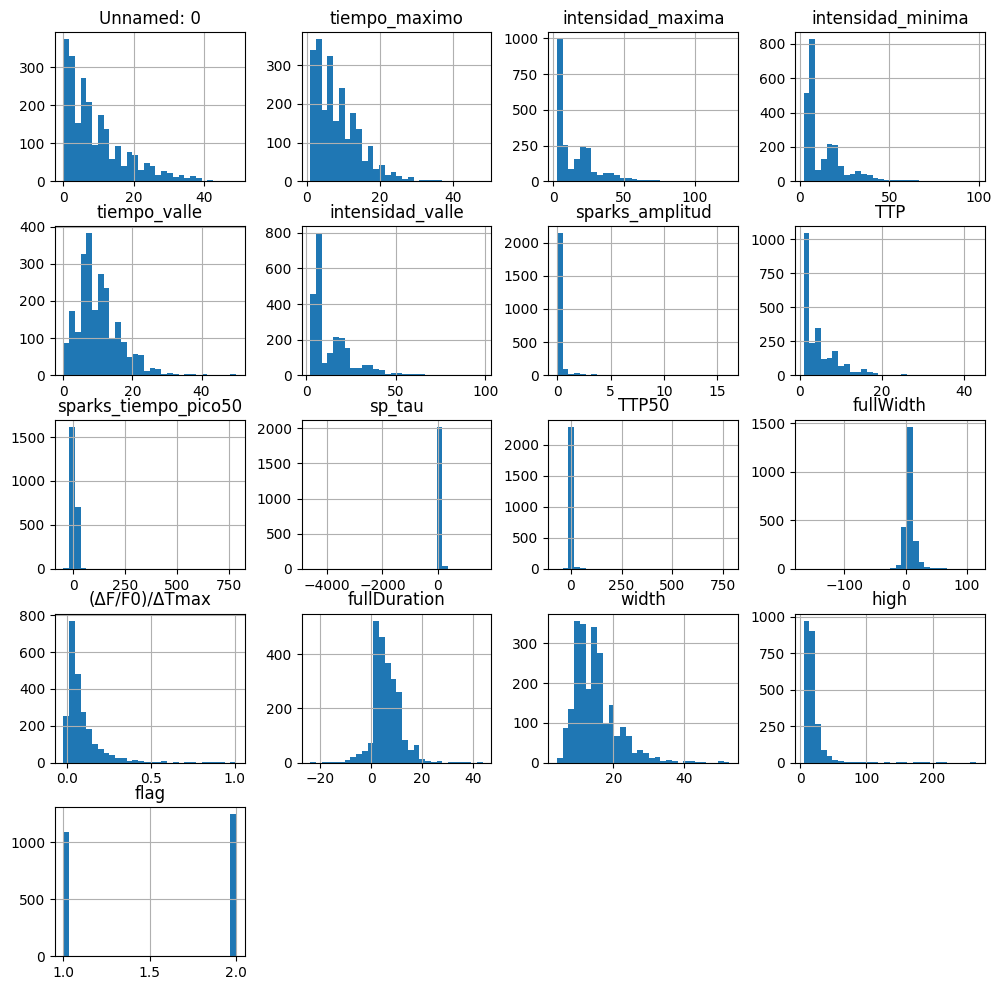

In [9]:
df.hist(figsize=(12,12), bins = 30)
plt.show()

In [38]:
#separo la tabla en dos grupos, segun el valor que presenten en la columna "flag"
df_1 = df[df["flag"] == 1]
df_2 = df[df["flag"] == 2]

Analisis de la columna "width"

(array([[ 29., 385., 426., 167.,  66.,  11.,   5.,   1.,   0.,   0.],
        [205., 504., 287., 133.,  55.,  36.,  12.,   7.,   2.,   5.]]),
 array([ 4. ,  8.9, 13.8, 18.7, 23.6, 28.5, 33.4, 38.3, 43.2, 48.1, 53. ]),
 <a list of 2 BarContainer objects>)

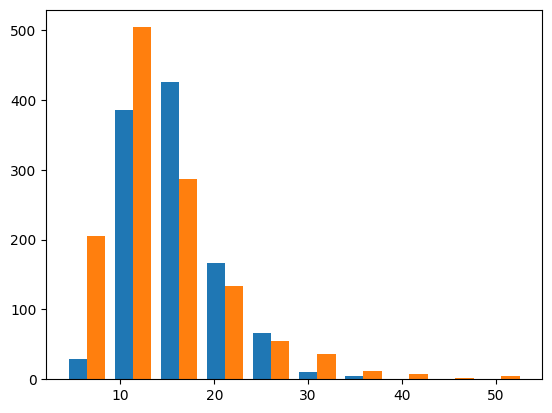

In [39]:
plt.hist([df_1["width"], df_2["width"]])

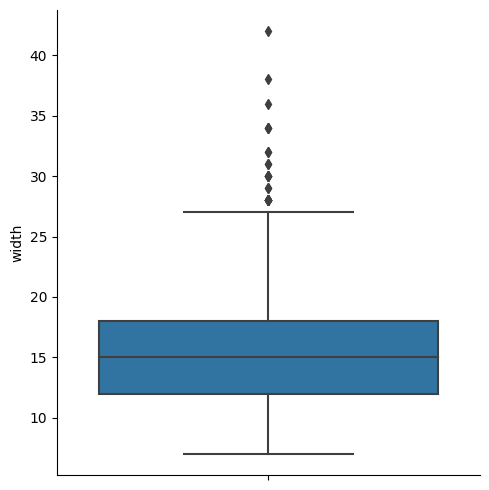

In [12]:
sns.catplot(x=None, y="width", kind="box", data = df_1)

In [13]:
#sns.catplot(x=None, y="width", kind="box", data = df_2)

In [14]:
df_1.shape

(1090, 17)

Tratamiento de outlayers

In [40]:
# En este código, Q1 y Q3 representan el percentil 2 y 98 de la columna "width", respectivamente. 
# Luego, se calcula el rango intercuartílico (IQR) como la diferencia entre Q3 y Q1.
# se crea idx que identifica los valores que están por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR). 
# Finalmente, se utiliza idx para filtrar los DataFrames  df_1 y df_2 y se les asigna el resultado a df_1_sin_outliers y df_2_sin_outliers
Q1 = df_1["width"].quantile(0.05)
Q3 = df_1["width"].quantile(0.95)
IQR = Q3 - Q1
df_1_sin_outliers = df_1[(df_1["width"] >= Q1 - 1.5 * IQR) & (df_1["width"] <= Q3 + 1.5 * IQR)]

Q1 = df_2["width"].quantile(0.05)
Q3 = df_2["width"].quantile(0.95)
IQR = Q3 - Q1
df_2_sin_outliers = df_2[(df_2["width"] >= Q1 - 1.5 * IQR) & (df_2["width"] <= Q3 + 1.5 * IQR)]


In [41]:
df_1_sin_outliers.shape

(1090, 17)

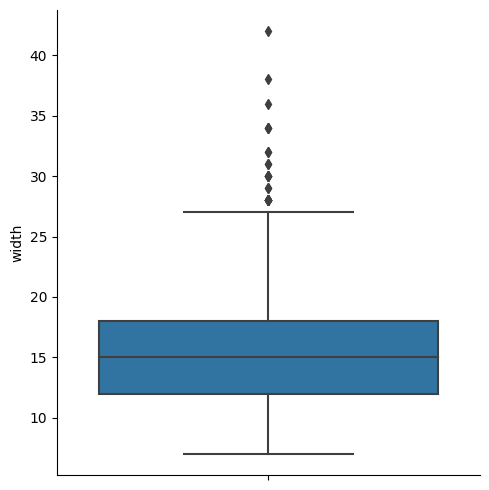

In [17]:
sns.catplot(x=None, y="width", kind="box", data=df_1_sin_outliers)

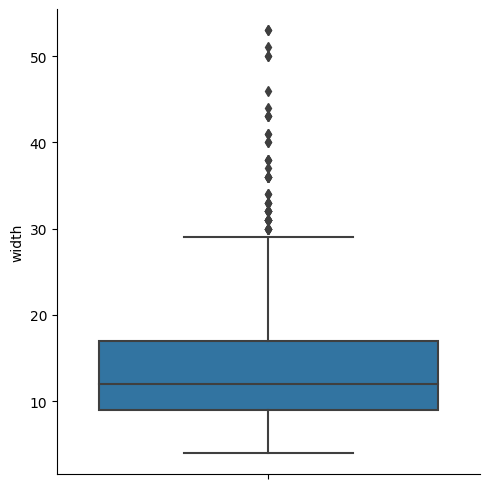

In [18]:
sns.catplot(x=None, y="width", kind="box", data=df_2_sin_outliers)

In [19]:
df_1_sin_outliers.head()

,Unnamed: 0,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
2,2,3.0,7.230769,6.884615,4.0,6.615385,0.050279,1.0,2.506131,11.242589,0.506131,18.0,0.050279,2.0,12.0,26.0,1.0
25,25,6.0,12.142857,9.761905,7.0,9.095238,0.243902,2.0,4.757271,3.460326,0.757271,6.0,0.121951,3.0,16.0,21.0,1.0
27,27,2.0,11.769231,9.846154,5.0,9.384615,0.195312,2.0,0.963789,14.896859,0.963789,4.0,0.097656,5.0,8.0,13.0,1.0
28,28,2.0,11.909091,9.727273,5.0,10.000000,0.224299,1.0,1.525253,21.036657,0.525253,2.0,0.224299,4.0,7.0,11.0,1.0
29,29,24.0,10.104167,7.927083,25.0,9.312500,0.274639,6.0,21.222022,12.256359,3.222022,9.0,0.045773,7.0,28.0,96.0,1.0


In [20]:
df_2_sin_outliers.head()

,Unnamed: 0,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
0,0,13.0,10.925926,7.740741,23.0,7.666667,0.411483,8.0,9.482171,32.285667,4.482171,11.0,0.051435,18.0,25.0,27.0,2.0
1,1,4.0,10.941176,8.117647,7.0,7.764706,0.347826,2.0,3.206613,9.208165,1.206613,12.0,0.173913,5.0,12.0,17.0,2.0
3,3,15.0,10.363636,7.454545,0.0,9.636364,0.390244,14.0,12.507874,NaN,11.507874,2.0,0.027875,-1.0,17.0,11.0,2.0
4,4,24.0,10.689655,7.931034,26.0,8.229885,0.347826,13.0,19.740930,7.648054,8.740930,25.0,0.026756,15.0,41.0,87.0,2.0
5,5,4.0,8.090909,7.727273,5.0,7.727273,0.047059,2.0,3.344829,21.746168,1.344829,4.0,0.023529,3.0,8.0,11.0,2.0


In [21]:
df_1_sin_outliers["width"].describe()

count    1090.000000
mean       15.563303
std         4.964348
min         7.000000
25%        12.000000
50%        15.000000
75%        18.000000
max        42.000000
Name: width, dtype: float64

In [22]:
df_2_sin_outliers["width"].describe()

count    1246.000000
mean       14.262440
std         6.990825
min         4.000000
25%         9.000000
50%        12.000000
75%        17.000000
max        53.000000
Name: width, dtype: float64

Calculo del nivel de confianza

Tamanio Muestral

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power
effect_size = 0.5  # Tamaño del efecto esperado
alpha = 0.05  # Nivel de significancia (probabilidad de cometer un error tipo I)
power = 0.8  # Potencia (1 - probabilidad de cometer un error tipo II)

sample_size = tt_ind_solve_power(effect_size=0.5, alpha=0.05, power=0.8)

print("Tamaño muestral necesario:", int(sample_size))

Tamaño muestral necesario: 63


In [34]:
from scipy.stats import wilcoxon

# Parámetros para el cálculo del tamaño muestral
effect_size = 0.5  # Tamaño del efecto esperado
alpha = 0.05  # Nivel de significancia
power = 0.8  # Poder estadístico deseado

# Función para calcular el tamaño muestral
def calculate_sample_size(effect_size, alpha, power):
    n = 2  # Inicialización del tamaño muestral
    while True:
        _, p_value = wilcoxon([0] * n, [effect_size] * n)
        if p_value < alpha or n >= 100000:
            break
        n += 1
    return n

# Cálculo del tamaño muestral
sample_size = calculate_sample_size(effect_size, alpha, power)

# Imprimir el tamaño muestral calculado
print("Tamaño muestral:", sample_size)

Tamaño muestral: 6


In [ ]:
#Contraste de hipótesis
def aplicar_shapiro_test(column):
    statistic, pvalue = ss.shapiro(column)
    if pvalue > 0.05:
        print("la dist de es normal: pvalue =", pvalue)
    else: 
        print("la dist no es normal: pvalue =", pvalue)

aplicar_shapiro_test(df_1_sin_outliers["width"])
aplicar_shapiro_test(df_2_sin_outliers["width"])

    

la dist no es normal: pvalue = 1.1941276258043541e-20
la dist no es normal: pvalue = 5.590924067605381e-33


La prueba de Mann-Whitney U, también conocida como U de Mann-Whitney-Wilcoxon o prueba de rangos con signos, es un test no paramétrico utilizado para determinar si hay una diferencia significativa entre dos grupos independientes en una variable continua.

La prueba de Mann-Whitney U se utiliza cuando no se cumplen los supuestos de normalidad o igualdad de varianzas necesarios para realizar una prueba t de Student. En su lugar, se basa en los rangos de los datos para evaluar si hay una diferencia significativa entre los dos grupos.

El objetivo de la prueba de Mann-Whitney U es determinar si las muestras de dos grupos provienen de la misma población o si tienen una distribución de valores significativamente diferente. La hipótesis nula (H0) establece que no hay diferencia entre los grupos, mientras que la hipótesis alternativa (H1) establece que hay una diferencia significativa.

El procedimiento de la prueba de Mann-Whitney U implica asignar rangos a los valores de las dos muestras combinadas y calcular una estadística de prueba U. Luego, se compara el valor obtenido de la estadística de prueba con los valores críticos de la distribución de U para determinar si se rechaza o no la hipótesis nula.

Si la estadística de prueba U es menor que el valor crítico, se concluye que hay una diferencia significativa entre los grupos. En caso contrario, no se puede rechazar la hipótesis nula y se concluye que no hay evidencia suficiente para afirmar que los grupos difieren significativamente.

Contraste de hipotesis, test no parametricos 

In [ ]:

#MAN WITNEY
# asumir que las distribuciones tienen la misma forma 
#Los datos tienen que ser independientes.
#Los datos tienen que ser ordinales o bien se tienen que poder ordenarse de menor a mayor.
#No es necesario asumir que las muestras se distribuyen de forma normal o que proceden de poblaciones normales. Sin embargo, para que el test compare medianas, ambas han de tener el mismo tipo de distribución (varianza, asimetría, ...).
#Igualdad de varianza entre grupos (homocedasticidad).

from scipy.stats import ks_2samp
import scipy.stats as stats

def aplicar_levene(col1, col2):
    statistics, pvalue = stats.levene(col1, col2)
    if pvalue > 0.05:
       print("No existe una diferencia significativa entre las varianzas de los grupos, pvalue =", pvalue)
    else:
       print("Existe una diferencia significativa entre las varianzas de los grupos =", pvalue)
       
## ME DA DIFERENCIAS EN LAS VARIANZAS, ESTA BIEN APLICAR MANNWHITNEY?

def aplicar_mannwhitneyu(col1, col2):
    statistic, pvalue = ss.mannwhitneyu(col1, col2, use_continuity=True, alternative='two-sided', axis=0, method='auto', nan_policy='propagate', keepdims=False)
    if pvalue > 0.05:
        print("No hay una diferencias significativas entre las distribuciones de los grupos : pvalue =", pvalue)
    else: 
        print("Hay diferencias significativas entre las distribuciones de los grupos", pvalue)
        

def aplicar_Kolmogorov(col1, col2):
    estadistico, pvalue = ks_2samp (col1, col2)
    if pvalue > 0.05:
       print("los conjuntos provienen de la misma distribucion =", pvalue)
    else:
       print("los dos conjuntos de datos de muestra no provienen de la misma distribución =", pvalue)        

aplicar_levene(df_1_sin_outliers["width"],  df_2_sin_outliers["width"])
aplicar_mannwhitneyu(df_1_sin_outliers["width"],  df_2_sin_outliers["width"])
aplicar_Kolmogorov(df_1_sin_outliers["width"],  df_2_sin_outliers["width"])


#un valor p tan pequeño sugiere fuertemente que hay una diferencia significativa entre 
# los grupos que estás comparando. Por lo tanto, puedes concluir que existe evidencia 
# estadística sólida para rechazar la hipótesis nula y afirmar que los grupos difieren 
# de manera significativa en la variable que se está analizando

Existe una diferencia significativa entre las varianzas de los grupos = 2.5143639144404683e-09
Hay diferencias significativas entre las distribuciones de los grupos 1.0946729734710784e-22
los dos conjuntos de datos de muestra no provienen de la misma distribución = 3.993346943681931e-27


In [63]:
#para realizar el test de wilcoxon debemos tener columnas con igual largo. 
# Es por esto que hice un a reduccion aleatoria del numero de filas para que el largo este igualado
f1,c = df_1_sin_outliers.shape
f2,c = df_2_sin_outliers.shape
print("filas de df_1:",f1,"filas de df_2:",f2)
if f1>f2:
    df_1_sin_outliers_red= df_1_sin_outliers.sample(f2)
    f3,c = df_1_sin_outliers_red.shape
    print("se redujo df_1 a", f3)
    print("df_2:", f2)
if f1<f2:
    df_2_sin_outliers_red= df_2_sin_outliers.sample(f1)
    f4,c = df_2_sin_outliers_red.shape
    print("se redujo df_2 a", f4)
    print("df_1: ", f1)
else:
    pass


filas de df_1: 1090 filas de df_2: 1246
se redujo df_2 a 1090
df_1:  1090


In [58]:
def aplicar_wilcoxon(col1, col2):
    
    statistic, pvalue = ss.wilcoxon(col1, col2,zero_method='wilcox', correction=False, alternative='two-sided', method='auto', axis=0, nan_policy='propagate', keepdims = False)
    if pvalue > 0.05:
        print("No hay una diferencias significativas entre la media de los grupos : pvalue =", pvalue)
    else: 
        print("Hay diferencias significativas entre la media de los grupos, pvalue=", pvalue)

aplicar_wilcoxon(df_1_sin_outliers["width"], df_2_sin_outliers_red["width"])

filas de 1 1090 filas de 2 : 1246
se redujo f2 a, 1090
Hay diferencias significativas entre la media de los grupos, pvalue= 1.3795423540485293e-11


# Datos
data = df_1_sin_outliers["width"]


# Crea las categorías
categories = []
for value in data:
    if value <= np.percentile(data, 25):
        categories.append("Q1_width")
    elif value <= np.percentile(data, 50):
        categories.append("Q2_width")
    elif value <= np.percentile(data, 75):
        categories.append("Q3_width")
    else:
        categories.append("Q4_width")



# Datos
datos = df_1_sin_outliers["tiempo_valle"]

# Crea las categorías
categories = []
for value in datos:
    if value <= np.percentile(data, 25):
        categories.append("Q1_tiempo_valle")
    elif value <= np.percentile(data, 50):
        categories.append("Q2_tiempo_valle")
    elif value <= np.percentile(data, 75):
        categories.append("Q3_tiempo_valle")
    else:
        categories.append("Q4_tiempo_valle")


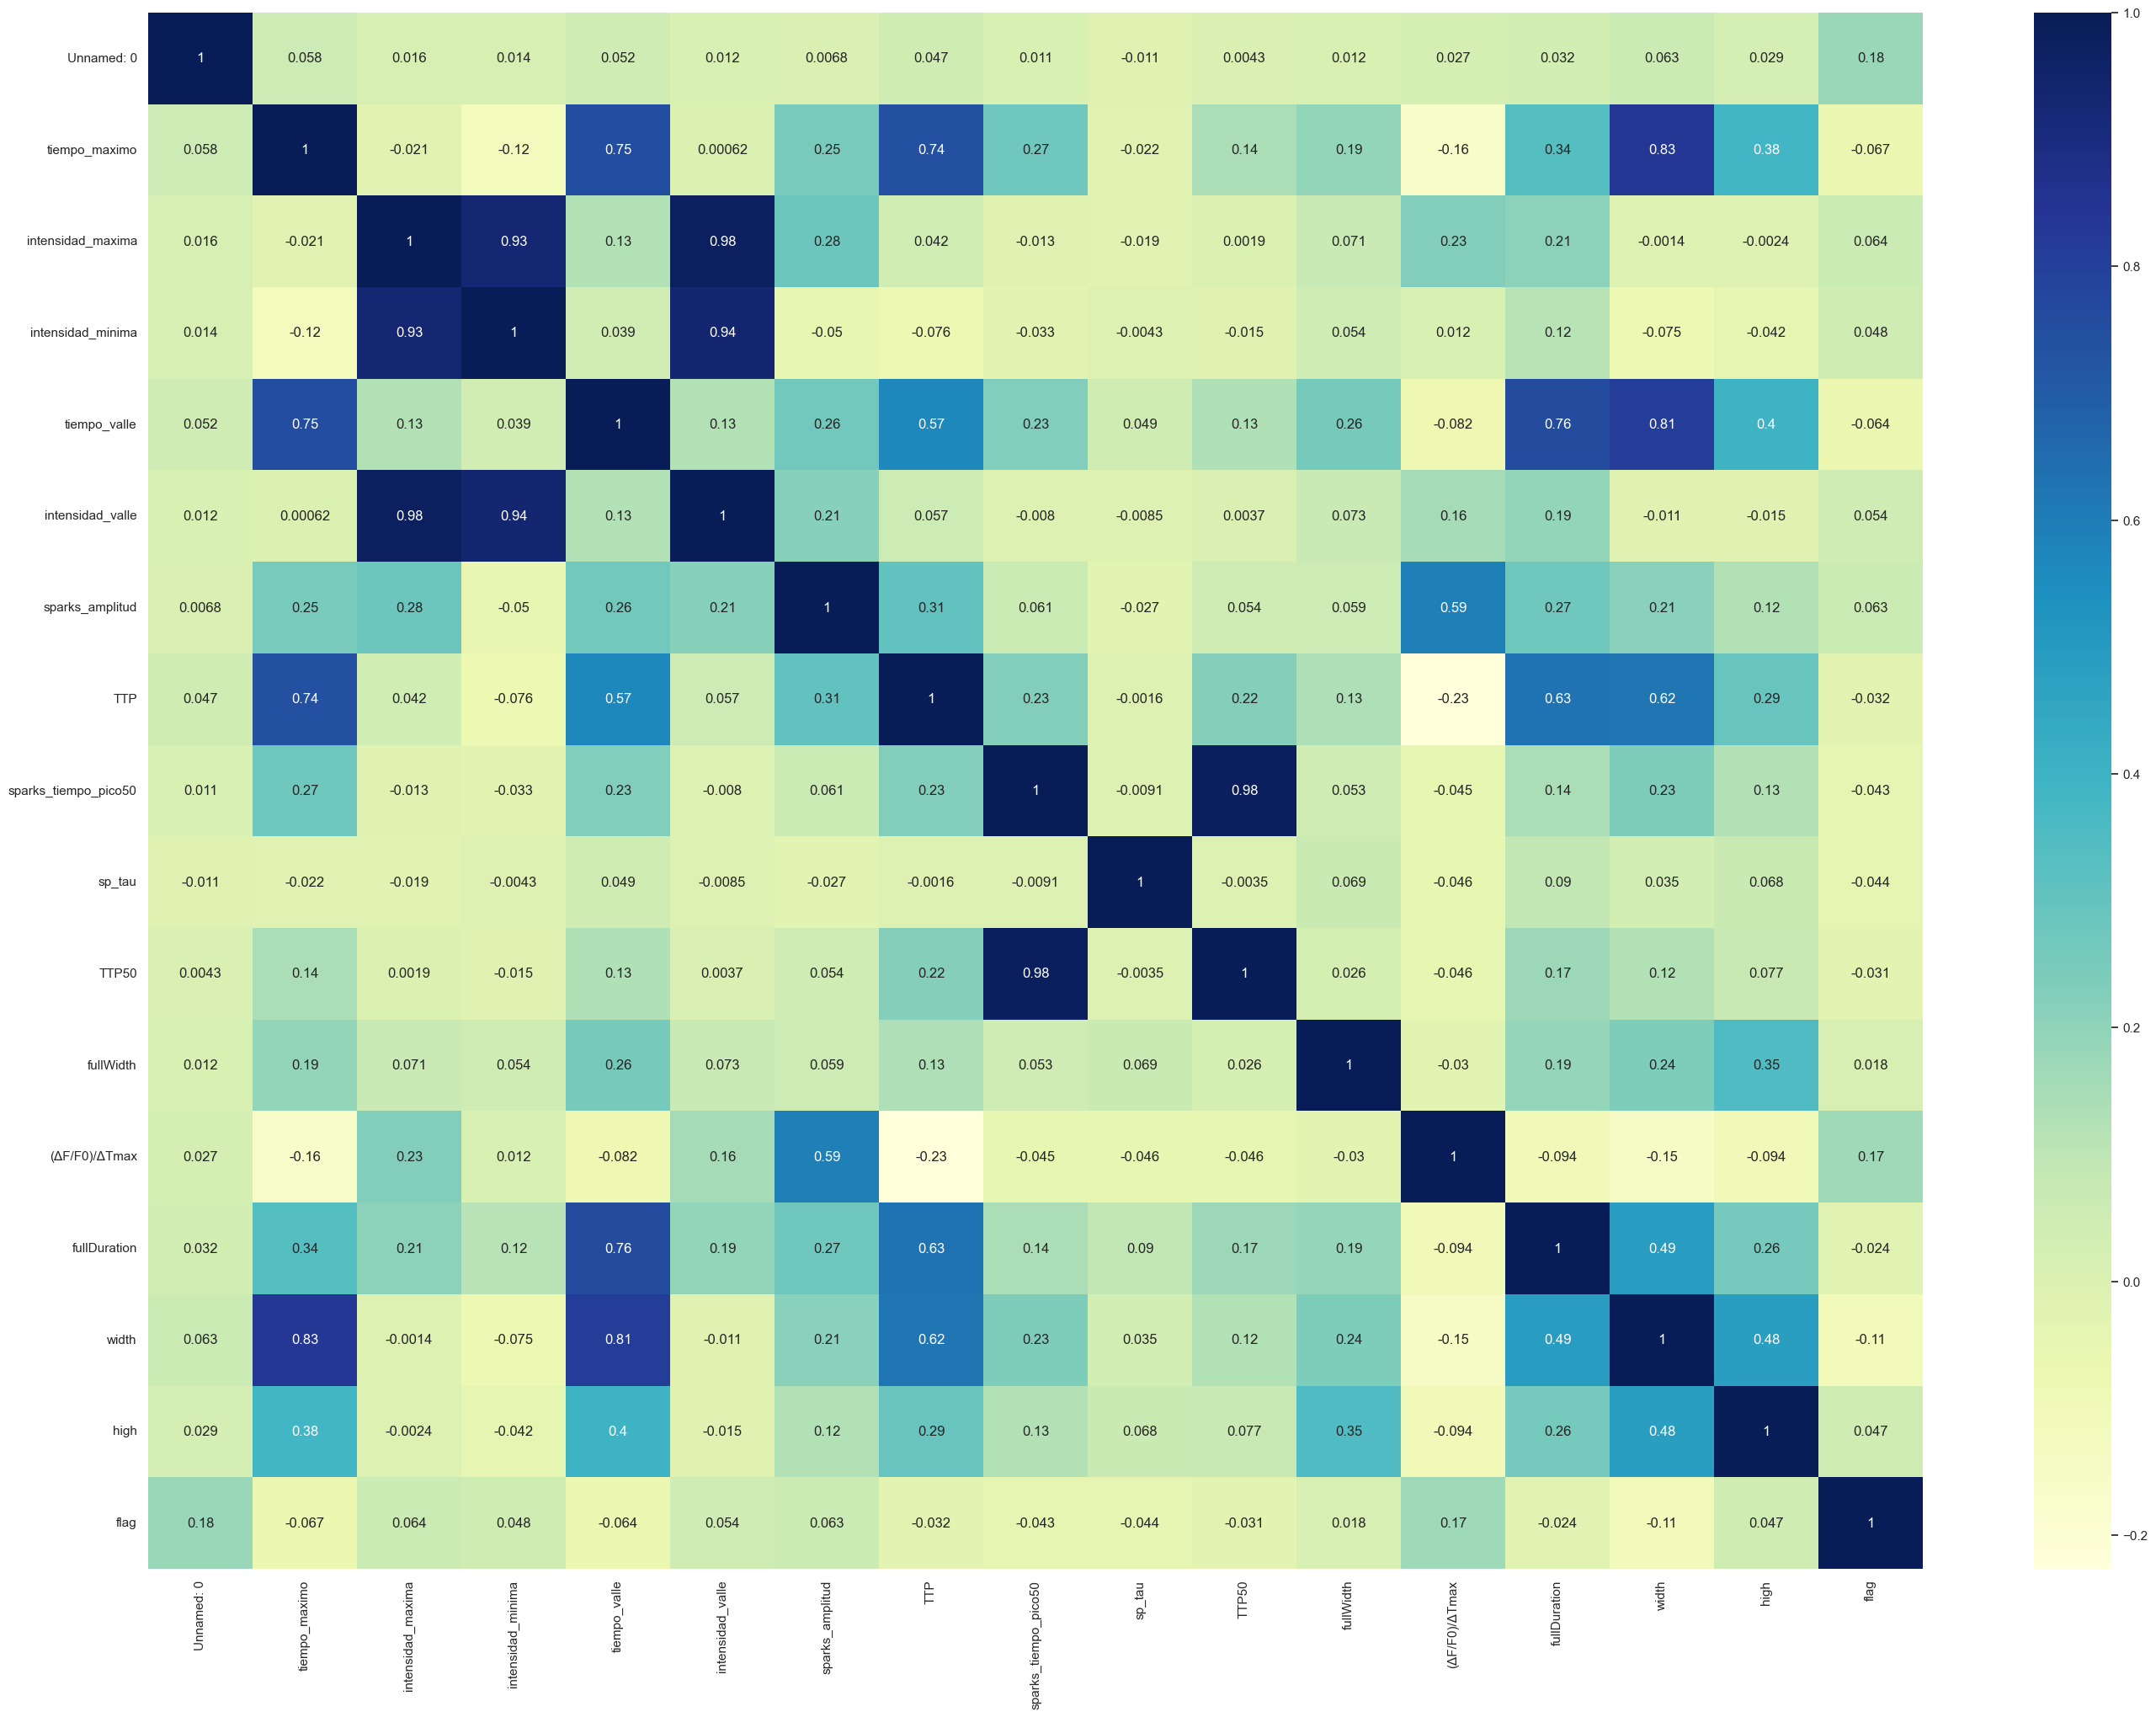

In [ ]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)
sns.set(rc={'figure.figsize':(34,24)})

Tabla de contingencia: relacion entre flag y presencia de NaN

In [76]:
import numpy as np
is_spark = []
for item in df["flag"]:
    if item == 1:
        is_spark.append(True)
    elif item == 2:
        is_spark.append(False)    

import math

is_nan = []
for item in df["sp_tau"]:
    if math.isnan(item):
        is_nan.append(False)
    else:
        is_nan.append(True)

print("is_nan: ",is_nan)  
print("is_spark: ",is_spark)  
        
data = {
    'is_spark': is_spark,
    'is_nan': is_nan
}        

df_contingencia = pd.DataFrame(data)

tabla_contingencia = pd.crosstab(df_contingencia['is_spark'], df_contingencia['is_nan'])
print(tabla_contingencia)

a = df_contingencia ['is_spark'] == True
b = df_contingencia ['is_nan'] == True

#comparamos los datos en una tabla de contingencia
groups = df_contingencia.groupby([a,b]).count() 
print("print groups:")
print (groups)

print(ss.chisquare(groups, ddof=0, axis=0))




is_nan:  [True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, Tru

Tabla de contingencia: relacion entre width y tiempo_valle

In [ ]:
import math
import numpy as np

#categorice las columnas, en dos grupos dependiendo de si estan por encima o por debajo de la media
whidth_under_mean = []
for value in df["width"]:
    if value <= 14.815603:
        whidth_under_mean.append(True)
    elif value > 14.815603:
        whidth_under_mean.append(False)    

tiempo_valle_under_mean = []
for value in df["tiempo_valle"]:
    if value <= 10.145120:
        tiempo_valle_under_mean.append(True)
    elif value > 10.145120:
        tiempo_valle_under_mean.append(False)  

print("whidth_under_mean: ",whidth_under_mean)  
print("tiempo_valle_under_mean: ",tiempo_valle_under_mean)  
 
#arme un df con las listas creadas anteriormente       
data_ = {
    'whidth_under_mean':whidth_under_mean,
    'tiempo_valle_under_mean': tiempo_valle_under_mean
}        

df_contingencia_ = pd.DataFrame(data_)

tabla_contingencia_ = pd.crosstab(df_contingencia_['whidth_under_mean'], df_contingencia_['tiempo_valle_under_mean'])
print("tabla_contingencia: ")
print(tabla_contingencia_)
a = df_contingencia_['whidth_under_mean']
b = df_contingencia_['tiempo_valle_under_mean']

#comparamos los datos en una tabla de contingencia
groups = df_contingencia_.groupby([a,b]).count() 
print("print groups:")
print (groups)

print(ss.chisquare(groups, ddof=0, axis=0))

intervalo de confianza

In [26]:
import numpy as np
from scipy import stats 
#calcular intervalo de confianza
confidence_level = 0.95
confidence_intervals = {}


for columna in df.columns:
    mean1 = np.mean(df_1_sin_outliers) #intervalo para flag1
    n1 = len(df_1_sin_outliers)
    std_error1 = np.std(df_1_sin_outliers, ddof=1) / np.sqrt(n1)
    margin_of_error1 = std_error1 * stats.t.ppf((1 + confidence_level) / 2, n1 - 1)
    confidence_interval_1 = (mean1 - margin_of_error1, mean1 + margin_of_error1)
    
    mean2 = np.mean(df_2_sin_outliers) #intervalo para flag2
    n2 = len(df_2_sin_outliers)
    std_error2 = np.std(df_2_sin_outliers, ddof=1) / np.sqrt(n2)
    margin_of_error2 = std_error2* stats.t.ppf((1 + confidence_level) / 2, n1 - 1)
    confidence_interval_2 = (mean1 - margin_of_error2, mean1 + margin_of_error2)
    
    confidence_intervals[columna] = (confidence_interval_1, confidence_interval_2)
    print(confidence_intervals)

{'Unnamed: 0': ((Unnamed: 0              9.322867
tiempo_maximo           9.424237
intensidad_maxima       8.935046
intensidad_minima       9.123694
tiempo_valle            9.422312
intensidad_valle        9.096558
sparks_amplitud         9.733596
TTP                     9.513398
sparks_tiempo_pico50    7.947574
sp_tau                  4.144270
TTP50                   7.951698
fullWidth               9.367262
(ΔF/F0)/ΔTmax           9.759618
fullDuration            9.443164
width                   9.469129
high                    9.267688
flag                    9.764168
dtype: float64, Unnamed: 0              10.205469
tiempo_maximo           10.104099
intensidad_maxima       10.593290
intensidad_minima       10.404643
tiempo_valle            10.106024
intensidad_valle        10.431779
sparks_amplitud          9.794740
TTP                     10.014939
sparks_tiempo_pico50    11.580763
sp_tau                  15.384066
TTP50                   11.576639
fullWidth               10.16107

Test de correlación

In [29]:
#determinar si existe una asociación entre dos variables y la fuerza de esta asociación.
#Coeficiente de correlación de Pearson: Es un test paramétrico que se utiliza para medir 
# la relación lineal entre dos variables continuas. El coeficiente de correlación de Pearson
# toma valores entre -1 y 1, donde -1 indica una correlación negativa perfecta, 0 indica \
# ausencia de correlación, y 1 indica una correlación positiva perfecta.


from scipy.stats import pearsonr


#test de correlación de Pearson
corr, p_value = pearsonr(df_1_sin_outliers["width"], df_1_sin_outliers["tiempo_maximo"])

print("Coeficiente de correlación:", corr)
print("Valor p:", p_value)


Coeficiente de correlación: 0.7834139992806171
Valor p: 5.667521695345137e-227


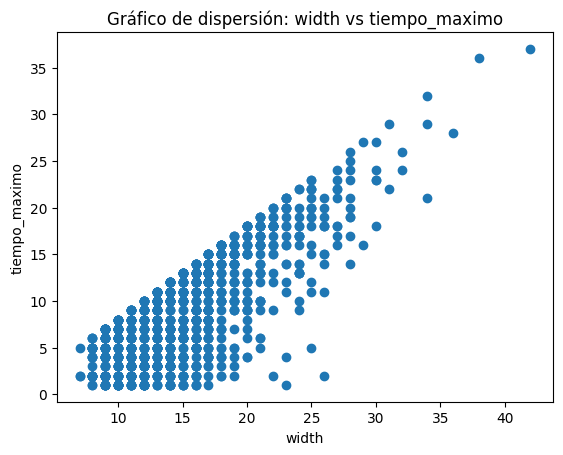

In [31]:
X = df_1_sin_outliers["width"]
Y = df_1_sin_outliers["tiempo_maximo"]

plt.scatter(X, Y)
plt.xlabel("width")
plt.ylabel("tiempo_maximo")
plt.title("Gráfico de dispersión: width vs tiempo_maximo")
plt.show()